# Setup instruction for PyMC3
- The tutorial copied here is taken form [this](https://www.pymc.io/projects/docs/en/latest/learn/core_notebooks/pymc_overview.html) website
- The installation guidelines for those using conda can be found [here](https://www.pymc.io/projects/docs/en/latest/installation.html)
- I used pip and had to install the following modules:
```console
pip install pymc3
pip install theano
pip install opencv-python pyopencl
```

In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pymc3 as pm
print(f'Running on PyMC v{pm.__version__}')

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v3.11.5


In [2]:
# initialize random number generator 
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use('arviz-darkgrid')

In [3]:
# True parameters
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor vairable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Stimulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

Text(0.5, 0, 'X2')

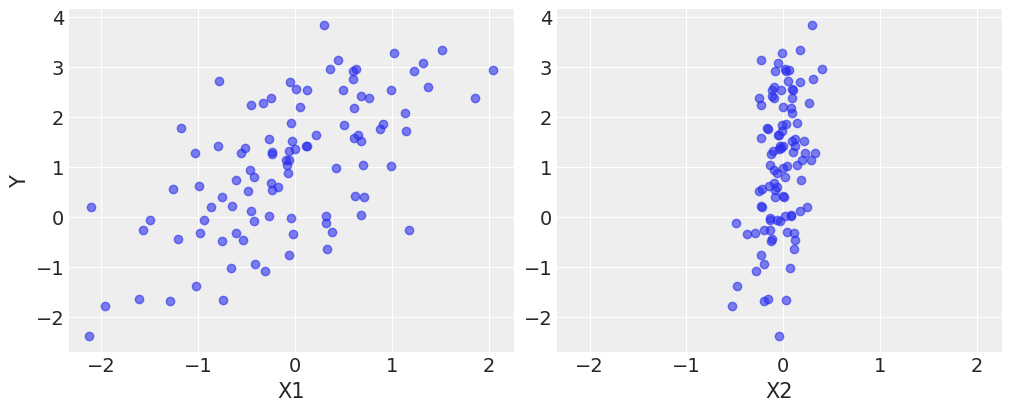

In [4]:
# plot data
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True, figsize=(10, 4))
ax[0].scatter(X1, Y, alpha=0.6)
ax[1].scatter(X2, Y, alpha=0.6)

ax[0].set_ylabel('Y')
ax[0].set_xlabel('X1')
ax[1].set_xlabel('X2')

In [5]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    # `shape` parameter indicate that `beta` is a vector type variable with two entries
    beta = pm.Normal('beta', mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal('sigma', sigma=1)
    
    mu = alpha + beta[0] * X1 + beta[1] * X2
    
    # This is essentially the likelihood of the model
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)

In [6]:
type(mu)

theano.tensor.var.TensorVariable

In [7]:
with basic_model:
    idata = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


In [8]:
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [9]:
type(idata)

arviz.data.inference_data.InferenceData

In [10]:
dir(idata)

['InferenceDataItemsView',
 'InferenceDataValuesView',
 '__abstractmethods__',
 '__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_attrs',
 '_group_names',
 '_groups',
 '_groups_all',
 '_groups_warmup',
 '_is_protocol',
 '_repr_html_',
 '_wrap_xarray_method',
 'add_groups',
 'assign',
 'assign_coords',
 'attrs',
 'chunk',
 'compute',
 'copy',
 'cumsum',
 'extend',
 'from_netcdf',
 'from_zarr',
 'get',
 'get_index',
 'groups',
 'isel',
 'items',
 'keys',
 'load',
 'log_likelihood'

In [11]:
idata.posterior['alpha'].sel(draw=slice(0, 4))

<xarray.DataArray 'alpha' (chain: 4, draw: 5)>
array([[0.97080185, 1.25104071, 1.25104071, 1.06904821, 1.17505262],
       [1.08120471, 1.0720398 , 1.18627134, 1.18627134, 1.09607075],
       [1.20764001, 1.08169813, 1.17413849, 1.23137095, 1.11924393],
       [1.2421166 , 1.12514581, 1.12514581, 1.16740516, 1.1765685 ]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4

In [12]:
type(idata.posterior['alpha'])

xarray.core.dataarray.DataArray

In [13]:
dir(idata.posterior['alpha'])

['T',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__dask_graph__',
 '__dask_keys__',
 '__dask_layers__',
 '__dask_optimize__',
 '__dask_postcompute__',
 '__dask_postpersist__',
 '__dask_scheduler__',
 '__dask_tokenize__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '_

In [14]:
dir(az)

['ColumnDataSource',
 'CoordSpec',
 'Dask',
 'DimSpec',
 'ELPDData',
 'InferenceData',
 'Numba',
 'PyStan2SamplingWrapper',
 'PyStanSamplingWrapper',
 'SamplingWrapper',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '__warningregistry__',
 '_arviz_style_path',
 '_calculate_ics',
 '_formatter',
 '_handler',
 '_linear_grey_10_95_c0',
 '_log',
 '_mpl_cm',
 'apply_test_function',
 'autocorr',
 'autocov',
 'bfmi',
 'clear_data_home',
 'compare',
 'concat',
 'convert_to_dataset',
 'convert_to_inference_data',
 'create_layout',
 'data',
 'dict_to_dataset',
 'ess',
 'extract_dataset',
 'from_cmdstan',
 'from_cmdstanpy',
 'from_dict',
 'from_emcee',
 'from_json',
 'from_netcdf',
 'from_numpyro',
 'from_pyjags',
 'from_pymc3',
 'from_pymc3_predictions',
 'from_pyro',
 'from_pystan',
 'hdi',
 'interactive_backend',
 'kde',
 'labels',
 'list_datasets',
 'load_arviz_data',
 'loo',
 'loo_pit',
 'make_uf

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

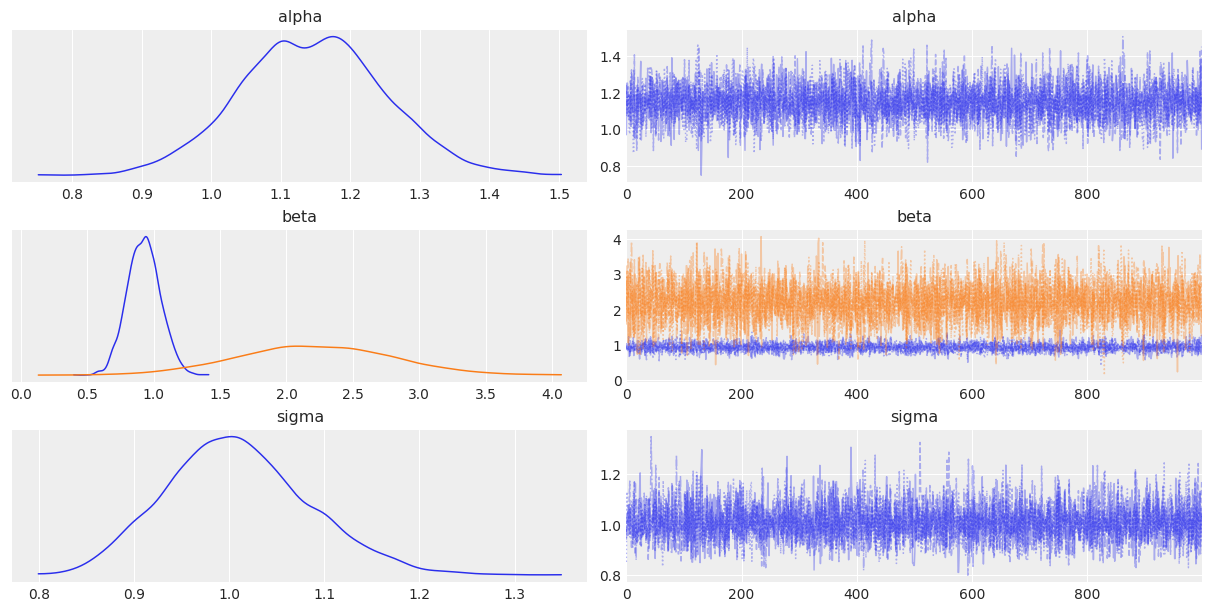

In [15]:
az.plot_trace(idata, combined=True)

In [16]:
az.summary(idata, round_to=4)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.1451,0.1030,0.9507,1.3358,0.0014,0.0010,5681.0018,3197.9380,1.0013
beta[0],0.9256,0.1241,0.6867,1.1525,0.0017,0.0012,5461.0215,3163.0579,1.0012
beta[1],2.2077,0.5798,1.1069,3.2738,0.0077,0.0055,5678.0526,3440.4744,1.0006
sigma,1.0088,0.0757,0.8680,1.1493,0.0009,0.0007,6917.0994,3115.0864,1.0007


# Trying things out on my own

Global inferencing seems to work

In [17]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pymc3 as pm
print(f'Running on PyMC v{pm.__version__}')

Running on PyMC v3.11.5


In [18]:
# Practice with global model mixing first
number_model = 2
model_location = 10
model_uncertainty = 1
true_location = -10
true_uncertainty = 0.5

RANDOM_SEED = 6666
y_obs = np.random.normal(loc=true_location, scale=true_uncertainty, size=100)
with pm.Model() as model:
    models = pm.Normal.dist(
        mu=pm.math.stack([-model_location, model_location]),
        sigma=model_uncertainty,
        shape=(2,)
    )
    
    shape_parameters = pm.LogNormal('shape_parameters', mu=0.0, sigma=1.0, shape=2)
    weights = pm.Dirichlet('weights', a=shape_parameters)
    
    likelihood = pm.Mixture('likelihood', w=weights, comp_dists=models, observed=y_obs)
    
    example_data = pm.sample(
        draws=10_000,
        tune=10_000,
        chains=8,
        target_accept=0.90,
        return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 4 jobs)
NUTS: [weights, shape_parameters]


Sampling 8 chains for 10_000 tune and 10_000 draw iterations (80_000 + 80_000 draws total) took 96 seconds.
There were 29 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 63 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1397 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7681754309461066, but should be close to 0.9. Try to increase the number of tuning steps.
There were 462 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8243592233421546, but should be close to 0.9. Try to increase the number of tuning steps.
There were 729 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8070347402821012, 

array([[<Axes: title={'center': 'shape_parameters'}>,
        <Axes: title={'center': 'shape_parameters'}>],
       [<Axes: title={'center': 'weights'}>,
        <Axes: title={'center': 'weights'}>]], dtype=object)

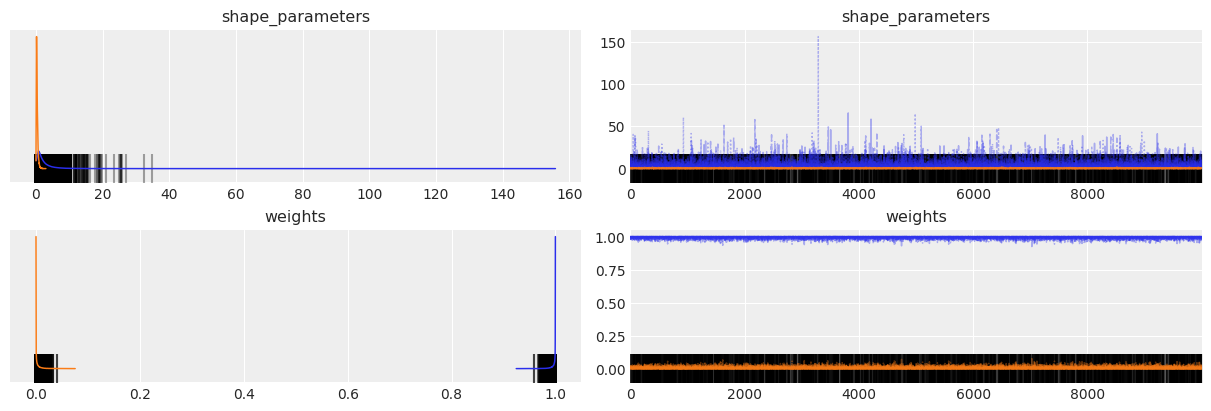

In [19]:
az.plot_trace(example_data, combined=True)

In [20]:
type(example_data.posterior['weights'].to_numpy())

numpy.ndarray

(array([7.9962e+04, 3.8000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 [<matplotlib.patches.Polygon at 0x7ff64657b7c0>])

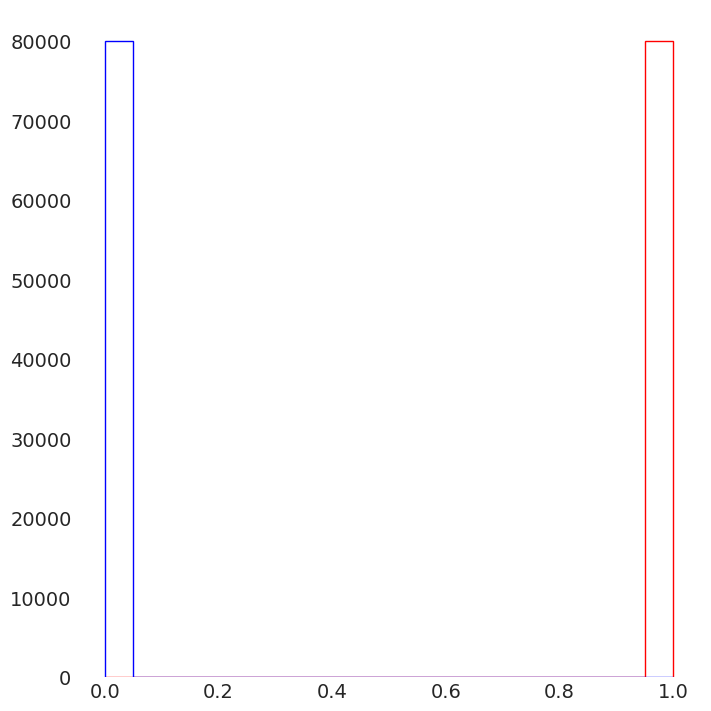

In [21]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 7))
ax.patch.set_facecolor('white')
bins=20
ranges=(0,1)
ax.hist(example_data.posterior['weights'].to_numpy().reshape(-1,2)[:,0], histtype='step', color='red', bins=bins, range=ranges)
ax.hist(example_data.posterior['weights'].to_numpy().reshape(-1,2)[:,1], histtype='step', color='blue', bins=bins, range=ranges)

In [22]:
# Practice with global model mixing first
number_model = 2
model_location = 10
model_uncertainty = 1
true_location = 10
true_uncertainty = 0.5

RANDOM_SEED = 6666
y_obs = np.random.normal(loc=true_location, scale=true_uncertainty, size=100)
with pm.Model() as model:
    models = pm.Normal.dist(
        mu=pm.math.stack([-model_location, model_location]),
        sigma=model_uncertainty,
        shape=(2,)
    )
    
    shape_parameters = pm.LogNormal('shape_parameters', mu=0.0, sigma=1.0, shape=2)
    weights = pm.Dirichlet('weights', a=shape_parameters)
    
    likelihood = pm.Mixture('likelihood', w=weights, comp_dists=models, observed=y_obs)
    
    example_data = pm.sample(
        draws=10_000,
        tune=10_000,
        chains=8,
        target_accept=0.90,
        return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 4 jobs)
NUTS: [weights, shape_parameters]


Sampling 8 chains for 10_000 tune and 10_000 draw iterations (80_000 + 80_000 draws total) took 97 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 64 divergences after tuning. Increase `target_accept` or reparameterize.
There were 189 divergences after tuning. Increase `target_accept` or reparameterize.
There were 324 divergences after tuning. Increase `target_accept` or reparameterize.
There were 161 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3538 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6729576688945835, but should be close to 0.9. Try to increase the number of tuning steps.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some para

array([[<Axes: title={'center': 'shape_parameters'}>,
        <Axes: title={'center': 'shape_parameters'}>],
       [<Axes: title={'center': 'weights'}>,
        <Axes: title={'center': 'weights'}>]], dtype=object)

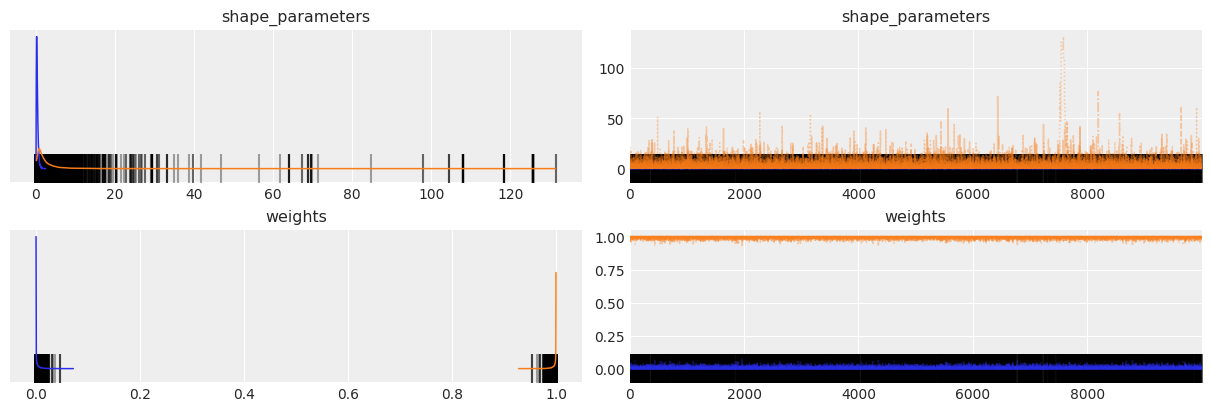

In [23]:
az.plot_trace(example_data, combined=True)

In [24]:
type(example_data.posterior['weights'].to_numpy())

numpy.ndarray

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.4000e+01, 7.9956e+04]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 [<matplotlib.patches.Polygon at 0x7ff643b3e740>])

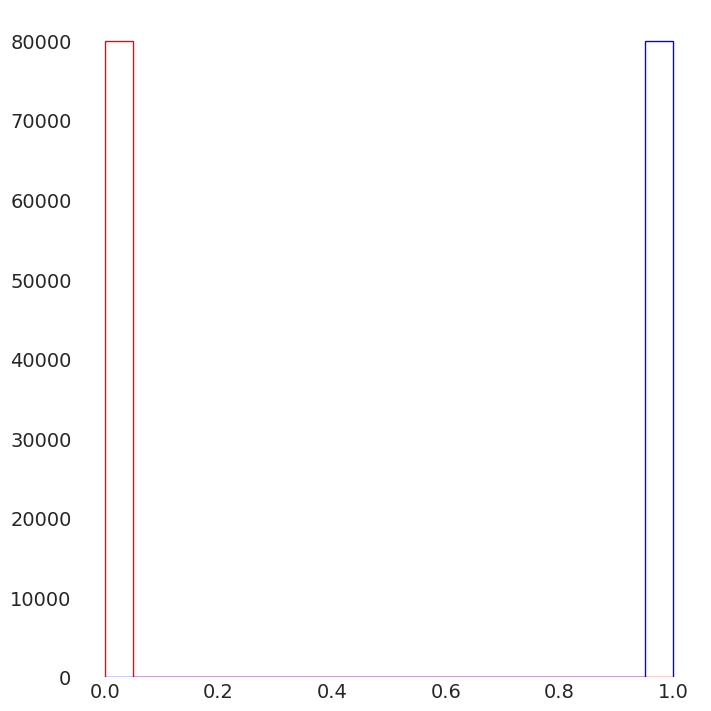

In [25]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 7))
ax.patch.set_facecolor('white')
bins=20
ranges=(0,1)
ax.hist(example_data.posterior['weights'].to_numpy().reshape(-1,2)[:,0], histtype='step', color='red', bins=bins, range=ranges)
ax.hist(example_data.posterior['weights'].to_numpy().reshape(-1,2)[:,1], histtype='step', color='blue', bins=bins, range=ranges)

In [26]:
# Practice with global model mixing first
number_model = 2
model_location = 10
model_uncertainty = 1
true_location = 0
true_uncertainty = 0.5

RANDOM_SEED = 6666
y_obs = np.random.normal(loc=true_location, scale=true_uncertainty, size=100)
with pm.Model() as model:
    models = pm.Normal.dist(
        mu=pm.math.stack([-model_location, model_location]),
        sigma=model_uncertainty,
        shape=(2,)
    )
    
    shape_parameters = pm.LogNormal('shape_parameters', mu=0.0, sigma=1.0, shape=2)
    weights = pm.Dirichlet('weights', a=shape_parameters)
    
    likelihood = pm.Mixture('likelihood', w=weights, comp_dists=models, observed=y_obs)
    
    example_data = pm.sample(
        draws=10_000,
        tune=10_000,
        chains=8,
        target_accept=0.90,
        return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 4 jobs)
NUTS: [weights, shape_parameters]


Sampling 8 chains for 10_000 tune and 10_000 draw iterations (80_000 + 80_000 draws total) took 75 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


array([[<Axes: title={'center': 'shape_parameters'}>,
        <Axes: title={'center': 'shape_parameters'}>],
       [<Axes: title={'center': 'weights'}>,
        <Axes: title={'center': 'weights'}>]], dtype=object)

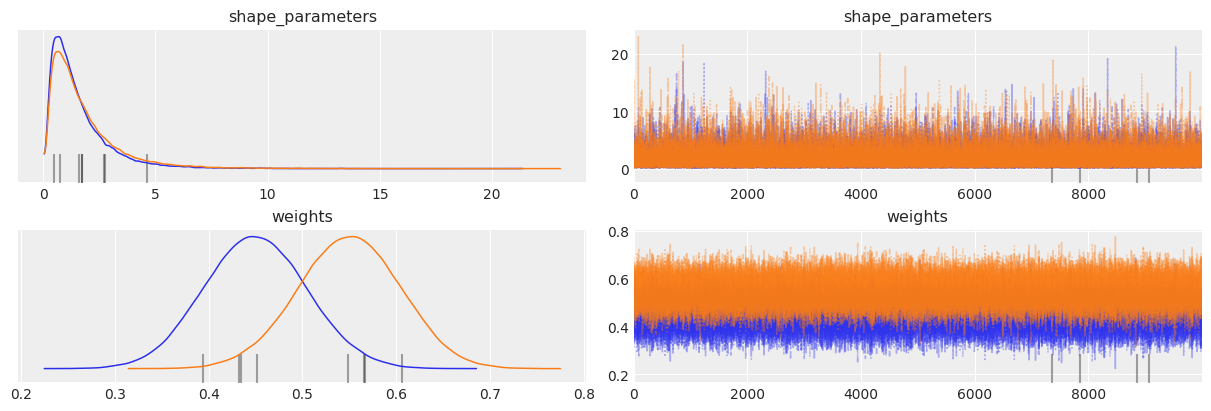

In [27]:
az.plot_trace(example_data, combined=True)

In [28]:
type(example_data.posterior['weights'].to_numpy())

numpy.ndarray

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+01, 2.1300e+02, 2.5810e+03, 1.1631e+04,
        2.5472e+04, 2.5625e+04, 1.1973e+04, 2.3070e+03, 1.8600e+02,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 [<matplotlib.patches.Polygon at 0x7ff635de2d40>])

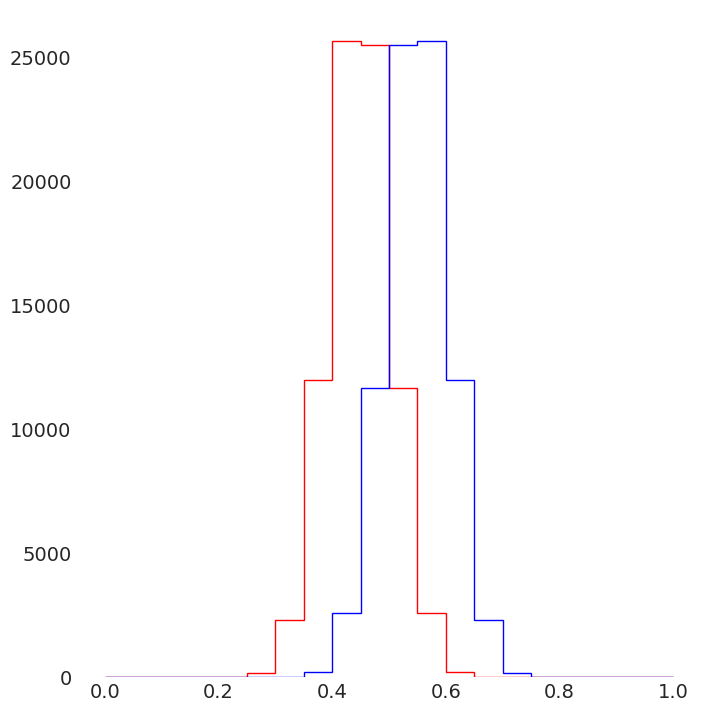

In [29]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 7))
ax.patch.set_facecolor('white')
bins=20
ranges=(0,1)
ax.hist(example_data.posterior['weights'].to_numpy().reshape(-1,2)[:,0], histtype='step', color='red', bins=bins, range=ranges)
ax.hist(example_data.posterior['weights'].to_numpy().reshape(-1,2)[:,1], histtype='step', color='blue', bins=bins, range=ranges)

# Can you register `Distribution`'s after creating them outside a context.

# Local inferencing

Now we need to think about how to restructure the class to make it easy to use PyMC3 with the same level of abstraction that we have been using with the other samplers.

## Brainstorming how to convert Taweret interface using PyMC3 interface

So PyMC3 allows you to define costum density, which could in principal be proxies for actual
underlying PyMC3 `Distribution` objects.
The `set_prior` stage could take in the actaully PyMC3 objects and then just _proxy_ them using the `DensityDist` object (how to do this for several priors remains difficult).

Alternatively, I can make the interface highly dependent upon PyMC3's interface and require the person to learning PyMC3.
This would however, clash with the rest of the Taweret design philosophy